Importing libraries

In [1]:
import numpy as np
import pandas as pd

# For building the neural network
# %pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#plotting related libraries
import matplotlib.pyplot as plt
import seaborn as sns
!pip install shap
import shap

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the dataset

In [3]:
# The location of your dataset inside your Goole Drive
dataset = pd.read_csv('/content/drive/MyDrive/Colab datasets/ML_dataset.csv')
dataset = dataset.dropna(axis=1, how='all')  # Dropping columns with all NaN values

# Take all rows, all columns except for the last column as X
X = dataset.iloc[:, :-1].values
# Take all rows, but only the last column as y
y = dataset.iloc[:, -1].values

Handling missing data by filling in the mean values

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:4])
X[:, 1:4] = imputer.transform(X[:, 1:4])

Encoding categorical data

In [5]:
#with label encoder:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the first column (column 0) of X
X[:, 0] = label_encoder.fit_transform(X[:, 0])

# Save the mapping of categories to integers
absorber_names = {index: label for index, label in enumerate(label_encoder.classes_)}

# Print the mapping (for reference)
print("Label Mapping:", absorber_names)

#with One hot encoder
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

Label Mapping: {0: 'CsPbBr3', 1: 'CsPbI3', 2: 'CsSnCl3', 3: 'CsSnI3'}


In [6]:
print(X)

[[1 0.1 1000000000000.0 10000000000.0]
 [1 0.1 1000000000000.0 100000000000.0]
 [1 0.1 1000000000000.0 1000000000000.0]
 ...
 [3 1.0 1e+16 10000000000000.0]
 [3 1.0 1e+16 100000000000000.0]
 [3 1.0 1e+16 1000000000000000.0]]


Splitting the dataset into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature scaling (important for neural networks)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
print(X_train)

[[ 0.46528507  1.22191296  1.98443951 -0.48671376]
 [ 0.46528507 -0.17124196 -0.31435264 -0.48671376]
 [-1.33581844  0.17704677 -0.54423186  2.18493123]
 ...
 [ 0.46528507  0.87362423  1.98443951 -0.51343021]
 [-1.33581844  1.22191296 -0.31435264 -0.51343021]
 [ 0.46528507 -0.86781942  1.98443951 -0.51367308]]


In [10]:
# Printing the highest and lowest values in X_train

print("Highest value in X_train:", np.max(X_train))
print("Lowest value in X_train:", np.min(X_train))

Highest value in X_train: 2.1849312284622697
Lowest value in X_train: -1.564396882856014


Building the Neural Network

In [ ]:
model = Sequential()

# Adding the input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Adding second hidden layer
model.add(Dense(units=64, activation='relu'))

# Adding output layer (since it's regression, no activation or 'linear' activation)
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Training the Neural Network
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 69.3763 - mean_absolute_error: 6.7459 - val_loss: 47.8692 - val_mean_absolute_error: 5.5000
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.7027 - mean_absolute_error: 5.3511 - val_loss: 33.9296 - val_mean_absolute_error: 4.9717
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.5360 - mean_absolute_error: 4.8934 - val_loss: 28.4689 - val_mean_absolute_error: 4.9546
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.3444 - mean_absolute_error: 4.7510 - val_loss: 25.5057 - val_mean_absolute_error: 4.7190
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.8697 - mean_absolute_error: 4.4472 - val_loss: 23.5395 - val_mean_absolute_error: 4.5381
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.0569 - mean_absolute_error: 4.3850 - val_loss: 21.4474 - val_mean_absolute_error: 4.3291
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.6648 - mean_absolute_error: 4.1

Evaluating the model

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0863 - mean_absolute_error: 0.2177 
Test Loss: 0.08058066666126251, Test MAE: 0.2103564739227295


Plotting training history

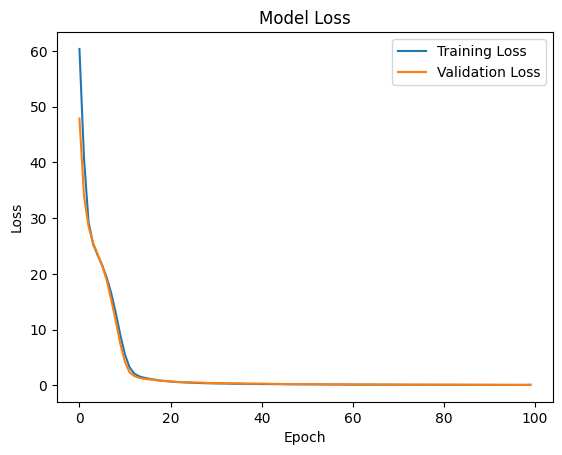

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Predicting the results

In [ ]:
y_pred = model.predict(X_test)
# Optional codes, just to check the prediction vs actual values.
np.set_printoptions(precision=2)
for pred, true_value in zip(y_pred, y_test):
    print(f"{pred[0]:.2f} {true_value:.2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
11.14 11.15
2.04 2.48
8.44 8.64
11.57 10.74
5.90 6.25
5.00 5.18
12.80 13.04
-0.24 0.01
-0.24 0.01
-0.09 0.02
2.61 2.59
-0.20 0.02
2.59 2.59
4.40 4.46
4.02 4.07
4.00 4.25
-0.19 0.02
9.37 9.31
7.09 8.26
-0.09 0.02
-0.41 0.02
-0.29 0.01
-0.10 0.01
-0.10 0.01
-0.31 0.01
8.55 8.71
9.76 9.91
11.01 11.12
12.31 11.91
-0.04 0.02
6.38 5.90
5.48 5.81
14.05 13.92
5.57 6.25
5.23 5.32
-0.25 0.01
12.84 12.71
-0.17 0.02
14.24 14.55
4.76 4.75
0.01 0.01
12.62 13.11
4.92 5.05
11.98 12.27
10.54 11.07
4.28 4.60
2.61 2.59
-0.34 0.01
-0.09 0.02
9.43 9.68
12.59 12.64
-0.13 0.01
-0.27 0.01
14.22 14.47
-0.22 0.02
-0.09 0.02
6.03 5.90
9.01 9.35
4.38 4.66
-0.30 0.01
5.98 5.89
4.73 4.73
3.44 3.47
9.26 9.50
-0.31 0.01
5.06 5.13
4.27 4.63
11.36 11.44
13.91 14.29
-0.27 0.01
3.84 3.81
14.02 13.96
13.20 13.21
4.69 4.84
13.87 13.82
-0.09 0.02
14.24 14.55
14.18 14.75
3.07 3.11
5.17 5.17
-0.27 0.02
-0.10 0.01
3.72 3.90
13.12 13.45
11.31 11.24
0.16 0.01
10.22 10.28
11.36 11.44
7.97 8.8

R^2 score, The more it is closer to 1, the better the model.

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.996873077458594

Scatter Plot

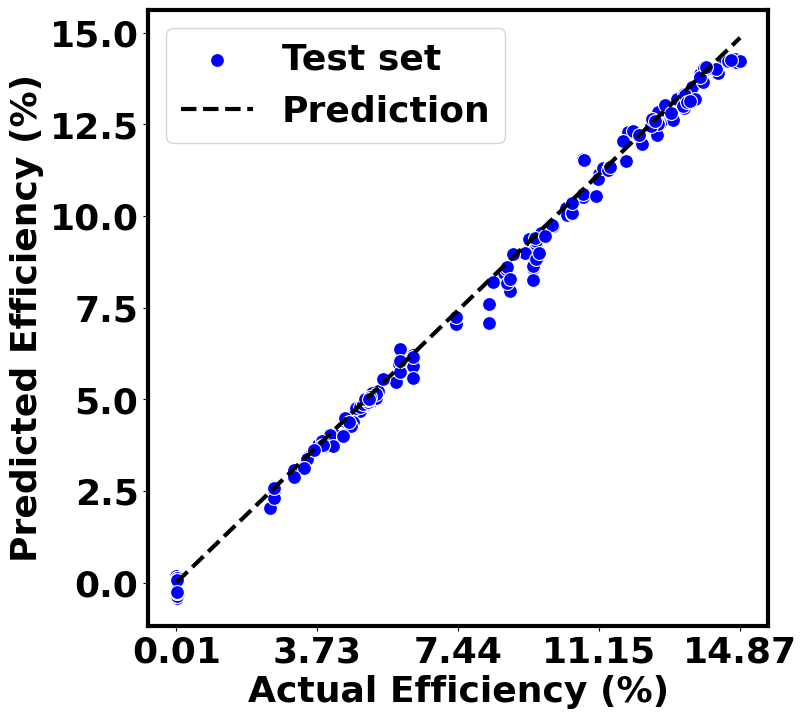

In [ ]:
# Reshape y_pred to be 1-dimensional if it's not
y_pred = y_pred.reshape(-1)  # This flattens y_pred into a 1D array


# Create a new figure with font properties set globally
plt.rcParams['font.size'] = 26
plt.rcParams['font.weight'] = 'bold'

plt.figure(figsize=(8, 8))

# Plot test set (blue dots)
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Test set', s=100)

# Plot a dashed diagonal line representing the perfect prediction
min_val = min(y_test)
max_val = max(y_test)
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', linewidth=3, label='Prediction')

# Set plot title and labels
plt.xlabel('Actual Efficiency (%)', fontweight='bold', fontsize=26)
plt.ylabel('Predicted Efficiency (%)', fontweight='bold', fontsize=26)
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)

# Increase the number of x-axis labels
x_ticks = np.linspace(start=min_val, stop=max_val, num=5)
plt.xticks(x_ticks)

# Show the legend
plt.legend()

# Display the plot
plt.show()

SHAP curve (NN)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  0%|          | 0/960 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/1 ━━━━━━━━

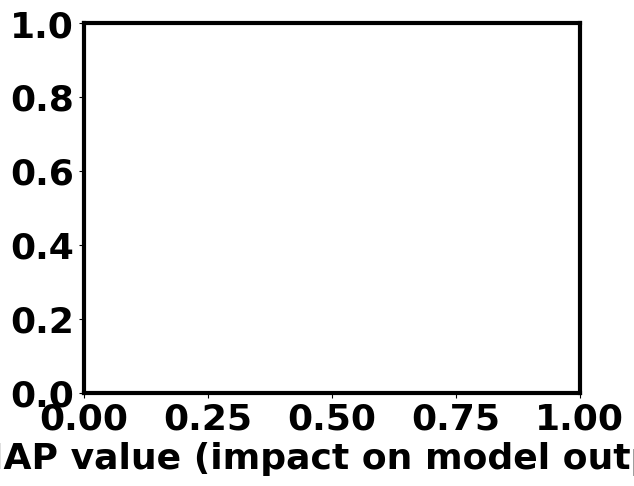

In [ ]:
# Initialize the SHAP explainer with the model and the data
# explainer = shap.Explainer(model, feature_names=['Absorber','Thickness', 'Defect', 'Donor Density'])

# Create a TreeExplainer object
explainer = shap.KernelExplainer(model.predict, shap.kmeans(X_train, 10))

# Calculate SHAP values for the training data (you can also use a subset for faster computation)
shap_values = explainer.shap_values(X_train)  # Use a subset of the data

# Reshape shap_values to 2D if it has more than 2 dimensions
if shap_values.ndim > 2:
    shap_values = shap_values[:, :, 0]  # Assuming the last dimension is the output dimension

# Create an Explanation object
shap_values = shap.Explanation(shap_values, data=X_train, feature_names=['Absorber','Thickness', 'Defect', 'Donor Density'])
# If X_train has column names, use them, otherwise set to None

plt.xlabel("SHAP value (impact on model output)", fontweight='bold', fontsize=26)

for spine in plt.gca().spines.values():
    spine.set_linewidth(3)

shap.plots.beeswarm(shap_values)

plt.show()